In [ ]:
#EJERCICIO 1

In [28]:
pip install geopandas

In [29]:
import os, geopandas as gpd
import pandas as pd

In [30]:
shp_url="https://github.com/Enrique867/introgeodf/raw/refs/heads/main/maps/World_Countries/World_Countries.shp"
countries = gpd.read_file(shp_url)

In [18]:
type(countries)

geopandas.geodataframe.GeoDataFrame

In [31]:
# dimensions
countries.shape

(252, 2)

In [32]:
# names
countries.columns

Index(['COUNTRY', 'geometry'], dtype='object')

In [33]:
# some content
countries.head()

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


In [34]:
# what geometry?
countries.geom_type.unique()

array(['Polygon', 'MultiPolygon'], dtype=object)

In [35]:
# any missing values?
countries[countries.isna().any(axis=1)]

,COUNTRY,geometry


In [36]:
# types
countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   COUNTRY   252 non-null    object  
 1   geometry  252 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 4.1+ KB


<Axes: >

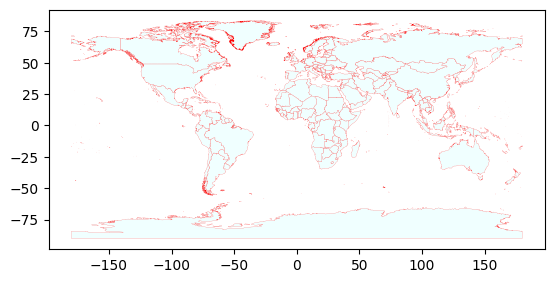

In [37]:
countries.plot(facecolor="azure",#color of polygon fill
               edgecolor='red', #color of lines
               linewidth=0.1) #thickness of lines

In [38]:
#Datos a importar:
rivers=gpd.read_file("https://github.com/Enrique867/introgeodf/raw/refs/heads/main/maps/World_Hydrography/World_Hydrography.shp" )
cities=gpd.read_file("https://github.com/Enrique867/introgeodf/raw/refs/heads/main/maps/World_Cities/World_Cities.shp")

In [39]:
rivers.geom_type.unique(), cities.geom_type.unique()

(array(['LineString', 'MultiLineString'], dtype=object),
 array(['Point'], dtype=object))

<Axes: >

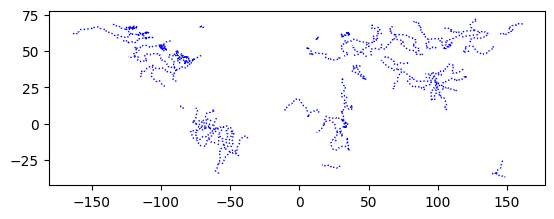

In [40]:
rivers.plot(edgecolor='blue',
            linewidth=1,
            linestyle='dotted')

<Axes: >

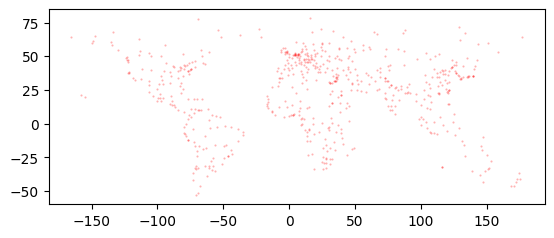

In [41]:
cities.plot(marker='.', # marker type
            color='red',
            markersize=1,
            alpha=0.3) # transparency

<Axes: >

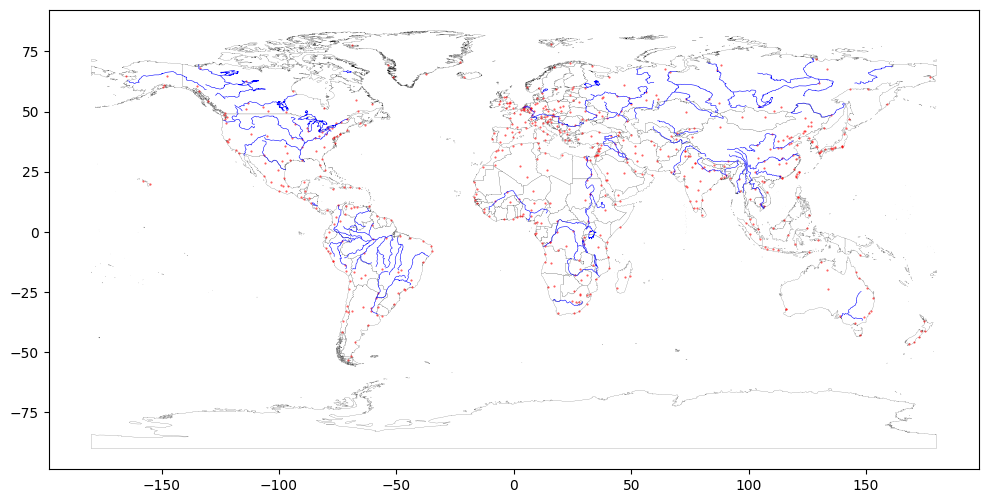

In [42]:
base = countries.plot(facecolor="white",
                      edgecolor='black',
                      linewidth=0.1,
                      figsize=(12,12))

rivers.plot(edgecolor='blue', linewidth=0.4,
            ax=base)# on top of...
cities.plot(marker='.', color='red', markersize=1,alpha=0.7,
            ax=base) # on top of...

In [43]:
# ONE file - SEVERAL layers
import os

countries.to_file(os.path.join("maps","worldMaps.gpkg"), layer='countries', driver="GPKG")
rivers.to_file(os.path.join("maps","worldMaps.gpkg"), layer='rivers', driver="GPKG")
cities.to_file(os.path.join("maps","worldMaps.gpkg"), layer='cities', driver="GPKG")

DataSourceError: sqlite3_open(maps/worldMaps.gpkg) failed: unable to open database file

In [44]:
# ONE file - SEVERAL layers
import os

# Create the 'maps' directory if it doesn't exist
if not os.path.exists("maps"):
    os.makedirs("maps")

countries.to_file(os.path.join("maps","worldMaps.gpkg"), layer='countries', driver="GPKG")
rivers.to_file(os.path.join("maps","worldMaps.gpkg"), layer='rivers', driver="GPKG")
cities.to_file(os.path.join("maps","worldMaps.gpkg"), layer='cities', driver="GPKG")

In [45]:
# ONE file - SEVERAL layers
import os

# Create the 'maps' directory if it doesn't exist
if not os.path.exists("maps"):
    os.makedirs("maps")

countries.to_file(os.path.join("maps","worldMaps.gpkg"), layer='countries', driver="GPKG")
rivers.to_file(os.path.join("maps","worldMaps.gpkg"), layer='rivers', driver="GPKG")
cities.to_file(os.path.join("maps","worldMaps.gpkg"), layer='cities', driver="GPKG")

In [ ]:
##MAP PROYECT: Aqui empieza el ejercicio

In [46]:
countries

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."
...,...,...
247,South Sudan,"POLYGON ((34.21807 9.96458, 34.20722 9.905, 34..."
248,Indonesia,"MULTIPOLYGON (((123.21846 -10.80917, 123.19832..."
249,East Timor,"MULTIPOLYGON (((124.41824 -9.3001, 124.40446 -..."
250,Curacao (Netherlands),"POLYGON ((-68.96556 12.19889, -68.91196 12.181..."


In [47]:
UK=countries[countries.COUNTRY=='United Kingdom']

In [48]:
UK.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [49]:
# check units of measurement
UK.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [50]:
# is this CRS projected?
UK.crs.is_projected

False

In [42]:
# centroid
UK.centroid

<ipython-input-42-256252f08de5>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  UK.centroid


,0
227,POINT (-2.89558 54.15535)


In [51]:
# recommended for Brazil (meters)
UK.to_crs(27700).crs.axis_info

[Axis(name=Easting, abbrev=E, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=N, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [52]:
# now this works with no warning
UK.to_crs(27700).centroid

,0
227,POINT (348609.801 461152.22)


<Axes: >

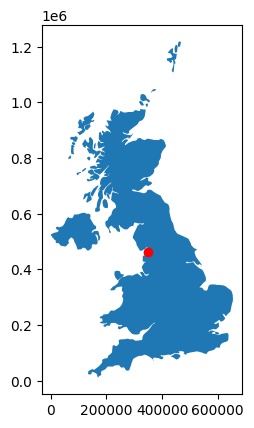

In [53]:
base27700=UK.to_crs(27700).plot()
UK.to_crs(27700).centroid.plot(color='red',ax=base27700)

In [46]:
cities_UK_27700=cities[cities.COUNTRY=='UK'].to_crs(27700)

In [47]:
riversUK_clipped=gpd.clip(rivers,UK)

In [48]:
UK_27700=UK.to_crs(27700)

rivers_UK_27700=riversUK_clipped.to_crs(UK_27700.crs)

In [49]:
import os

UK_27700.to_file(os.path.join("maps","UKMaps_27700.gpkg"), layer='country', driver="GPKG")
cities_UK_27700.to_file(os.path.join("maps","riversUK_27700.gpkg"), layer='cities', driver="GPKG")
rivers_UK_27700.to_file(os.path.join("maps","UKMaps_27700.gpkg"), layer='rivers', driver="GPKG")

In [50]:
#EJERCICIO 2: Aereopuertos

In [52]:
infoairports=pd.read_csv("https://github.com/Enrique867/introgeodf/raw/refs/heads/main/Data/airports.csv")


infoairports.iloc[[0,1,2,3,-4,-3,-2,-1],:]

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,icao_code,iata_code,gps_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total RF Heliport,40.070985,-74.933689,11.0,NaN,US,US-PA,Bensalem,no,NaN,NaN,K00A,00A,https://www.penndot.pa.gov/TravelInPA/airports...,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,NaN,NaN,00AA,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,NaN,NaN,00AK,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,NaN,NaN,00AL,00AL,NaN,NaN,NaN
83088,46378,ZZ-0001,heliport,Sealand Helipad,51.894444,1.482500,40.0,EU,GB,GB-ENG,Sealand,no,NaN,NaN,NaN,NaN,http://www.sealandgov.org/,https://en.wikipedia.org/wiki/Principality_of_...,Roughs Tower Helipad
83089,307326,ZZ-0002,small_airport,Glorioso Islands Airstrip,-11.584278,47.296389,11.0,AF,TF,TF-U-A,Grande Glorieuse,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83090,346788,ZZ-0003,small_airport,Fainting Goat Airport,32.110587,-97.356312,690.0,NaN,US,US-TX,Blum,no,NaN,NaN,87TX,87TX,NaN,NaN,NaN
83091,313629,ZZZZ,small_airport,Satsuma Iōjima Airport,30.784722,130.270556,338.0,AS,JP,JP-46,Mishima,no,NaN,NaN,RJX7,RJX7,NaN,http://wikimapia.org/6705190/Satsuma-Iwo-jima-...,"SATSUMA,IWOJIMA,RJX7"


In [53]:
infoairports.drop(index=0,inplace=True)
infoairports.reset_index(drop=True, inplace=True)
infoairports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,icao_code,iata_code,gps_code,local_code,home_link,wikipedia_link,keywords
0,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,NaN,NaN,00AA,00AA,NaN,NaN,NaN
1,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,NaN,NaN,00AK,00AK,NaN,NaN,NaN
2,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,NaN,NaN,00AL,00AL,NaN,NaN,NaN
3,506791,00AN,small_airport,Katmai Lodge Airport,59.093287,-156.456699,80.0,NaN,US,US-AK,King Salmon,no,NaN,NaN,00AN,00AN,NaN,NaN,NaN
4,322127,00AS,small_airport,Fulton Airport,34.942803,-97.818019,1100.0,NaN,US,US-OK,Alex,no,NaN,NaN,00AS,00AS,NaN,NaN,NaN


In [54]:
infoairports.columns

Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'iso_country', 'iso_region',
       'municipality', 'scheduled_service', 'icao_code', 'iata_code',
       'gps_code', 'local_code', 'home_link', 'wikipedia_link', 'keywords'],
      dtype='object')

In [55]:
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]

infoairports.info()

KeyError: "['region_name'] not in index"

In [ ]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

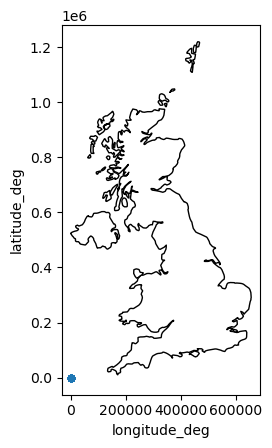

In [ ]:
#Mal ploteo
base = UK_27700.plot(color='white', edgecolor='black') #unprojected

# Mapa mal proyectado de aereopuertos
infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

In [ ]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg),
                 crs=4326)

<Axes: >

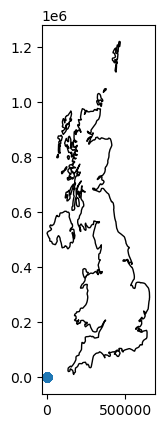

In [ ]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg),
                 crs=4326)# coordenadas y grados (sin proyeccion al mapa original)

# Mapa mal proyectado de aereopuertos

base = UK_27700.plot(color='white', edgecolor='black')
airports.plot(ax=base)

<Axes: >

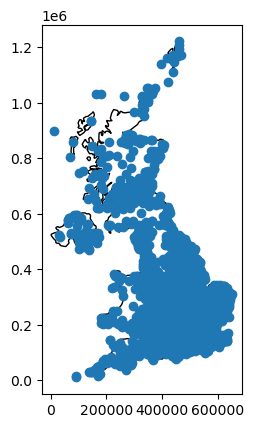

In [ ]:
airports_27700=airports.to_crs(27700)


#Mapa reproyectado de aereopuertos
base = UK_27700.plot(color='white', edgecolor='black', markersize=1)
airports_27700.plot(ax=base)

In [ ]:
airports_27700.crs

In [ ]:
airports_27700['type'].value_counts() # this will not work: airports.type.value_counts()

In [ ]:
airports_27700.rename(columns={'type':'kind'},inplace=True)

## Guaradado GPKG
airports_27700.to_file(os.path.join("maps","inglaterraMaps_27700.gpkg"), layer='airports', driver="GPKG")

In [ ]:
#EJERCICIO 3

In [ ]:
UK_27700

,COUNTRY,geometry
227,United Kingdom,"MULTIPOLYGON (((463756.802 1199461.295, 458260..."


In [ ]:
type(UK_27700.boundary)

geopandas.geoseries.GeoSeries

<Axes: >

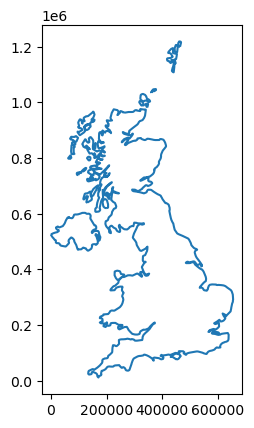

In [ ]:
#Solo los bordes
UK_27700.boundary.plot()

In [ ]:
# boundary retorna un GDF?
type(UK_27700.boundary)

geopandas.geoseries.GeoSeries

In [ ]:
#Convertimos
UK_27700.boundary.to_frame()

,0
227,"MULTILINESTRING ((463756.802 1199461.295, 4582..."


In [ ]:
UK_27700.boundary.to_frame().info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1 entries, 227 to 227
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   0       1 non-null      geometry
dtypes: geometry(1)
memory usage: 16.0 bytes


In [ ]:
# convercion
UK_border=UK_27700.boundary.to_frame()

# nueva columna
UK_border['name']='Brazil'

# geometria
UK_border.rename(columns={0:'geometry'},inplace=True)

#configuracion de geometria
UK_border = UK_border.set_geometry("geometry")

# verificamos
UK_border.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [ ]:
#EJERCICIO 4

In [ ]:
UK_border

,geometry,name
227,"MULTILINESTRING ((463756.802 1199461.295, 4582...",Brazil


In [ ]:
#EJERCICIO 3

In [127]:
UK_regiones=gpd.read_file(os.path.join("maps","ITL_1","ITL1_JAN_2025_UK_BFC.shp"))
UK_condados=gpd.read_file(os.path.join("maps","ITL_2","ITL2_JAN_2025_UK_BFC.shp"))
UK_distritos=gpd.read_file(os.path.join("maps","ITL_3","International_Territorial_Level_3_(January_2025)_Boundaries_UK_BFC_V2.shp"))

DataSourceError: maps/ITL_1/ITL1_JAN_2025_UK_BFC.shp: No such file or directory

In [ ]:
type(UK_regiones),type(UK_condados),type(UK_distritos)

(geopandas.geodataframe.GeoDataFrame,
 geopandas.geodataframe.GeoDataFrame,
 geopandas.geodataframe.GeoDataFrame)

In [ ]:
UK_regiones.head()

,ITL125CD,ITL125NM,BNG_E,BNG_N,LAT,LONG,GlobalID,geometry
0,TLC,North East (England),417317,575393,55.0727,-1.73036,883d3875-3b66-4060-b85f-3a91fe81e2f9,"MULTIPOLYGON (((450259.6 525943.8, 450261.4 52..."
1,TLD,North West (England),349989,463422,54.0643,-2.76560,712e3d99-d30d-4a7a-aa16-2ed86206a974,"MULTIPOLYGON (((327866.924 373722.305, 327869...."
2,TLE,Yorkshire and The Humber,452737,445838,53.9060,-1.19878,524442a2-0a4f-4445-9cb5-1163f51a386a,"MULTIPOLYGON (((495603.099 422511.497, 495629...."
3,TLF,East Midlands (England),477748,322635,52.7957,-0.84837,646d129c-88f9-4ab4-bfa9-15e551590d2d,"MULTIPOLYGON (((552751.427 326659.292, 552759...."
4,TLG,West Midlands (England),386293,295477,52.5570,-2.20360,bb6f534a-6049-41c1-a1e9-b9eb971c9621,"POLYGON ((445790.299 252455.405, 445782.903 25..."


In [ ]:
UK_condados.head()

,ITL225CD,ITL225NM,BNG_E,BNG_N,LAT,LONG,GlobalID,geometry
0,TLC3,Tees Valley,449140,521739,54.5885,-1.24112,31050e7e-fd0d-4ed4-8ffd-071632345546,"MULTIPOLYGON (((450259.6 525943.8, 450261.4 52..."
1,TLC4,"Northumberland, Durham and Tyne & Wear",402627,577731,55.0940,-1.96038,a823ed47-990e-4223-8195-f73348847456,"MULTIPOLYGON (((439170.69 557624.82, 439170.1 ..."
2,TLD1,Cumbria,341842,525692,54.6230,-2.90224,e8182039-7db8-47da-b31b-39c7c470009d,"MULTIPOLYGON (((321485.903 463795.299, 321473...."
3,TLD3,Greater Manchester,377929,401095,53.5061,-2.33424,ddc987f4-441e-4d53-9556-638d4d42f2f9,"POLYGON ((406087.197 404640.102, 406041.099 40..."
4,TLD4,Lancashire,362812,444720,53.8973,-2.56741,919d2406-9090-48eb-9aab-428eda32ab07,"MULTIPOLYGON (((337136.5 422474, 337133.067 42..."


In [ ]:
UK_distritos.head()

,FID,ITL325CD,ITL325NM,BNG_E,BNG_N,LAT,LONG,Shape__Are,Shape__Len,GlobalID,geometry
0,1,TLC31,Hartlepool and Stockton-on-Tees,444955,522013,54.59133,-1.30583,2.988302e+08,170566.054415,84c38a7b-d2d5-40c3-8318-03b9e802688e,"MULTIPOLYGON (((447177.704 517811.797, 447176...."
1,2,TLC32,South Teesside,461690,519596,54.56785,-1.04739,2.989886e+08,113668.576367,389163d9-2470-49b2-9711-c6721b4bbc1a,"MULTIPOLYGON (((446854.7 517192.7, 446854.281 ..."
2,3,TLC33,Darlington,428029,515648,54.53534,-1.56836,1.974895e+08,107285.227956,4d1c9dc6-ea76-417c-b42f-a4ebc0af353b,"POLYGON ((436388.002 522354.197, 436392.298 52..."
3,4,TLC41,Durham,410383,532242,54.68513,-1.84048,2.230843e+09,315818.035374,83db22e9-8b52-4968-9671-5ae6fbf40374,"POLYGON ((428366.003 554230.403, 428358.203 55..."
4,5,TLC42,Northumberland,395323,600700,55.30038,-2.07522,5.032309e+09,605682.922003,da42f065-4f21-4705-a9b8-ac77b762a4e4,"MULTIPOLYGON (((429380.896 604848.303, 429384...."


In [ ]:
UK_regiones.crs,UK_condados.crs, UK_distritos.crs

(<Projected CRS: EPSG:27700>
 Name: OSGB36 / British National Grid
 Axis Info [cartesian]:
 - E[east]: Easting (metre)
 - N[north]: Northing (metre)
 Area of Use:
 - name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
 - bounds: (-9.01, 49.75, 2.01, 61.01)
 Coordinate Operation:
 - name: British National Grid
 - method: Transverse Mercator
 Datum: Ordnance Survey of Great Britain 1936
 - Ellipsoid: Airy 1830
 - Prime Meridian: Greenwich,
 <Projected CRS: EPSG:27700>
 Name: OSGB36 / British National Grid
 Axis Info [cartesian]:
 - E[east]: Easting (metre)
 - N[north]: Northing (metre)
 Area of Use:
 - name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
 - bounds: (-9.01, 49.75, 2.01, 61.01)
 Coordinate Operation:
 - name: British National Grid
 - method: 

<Axes: >

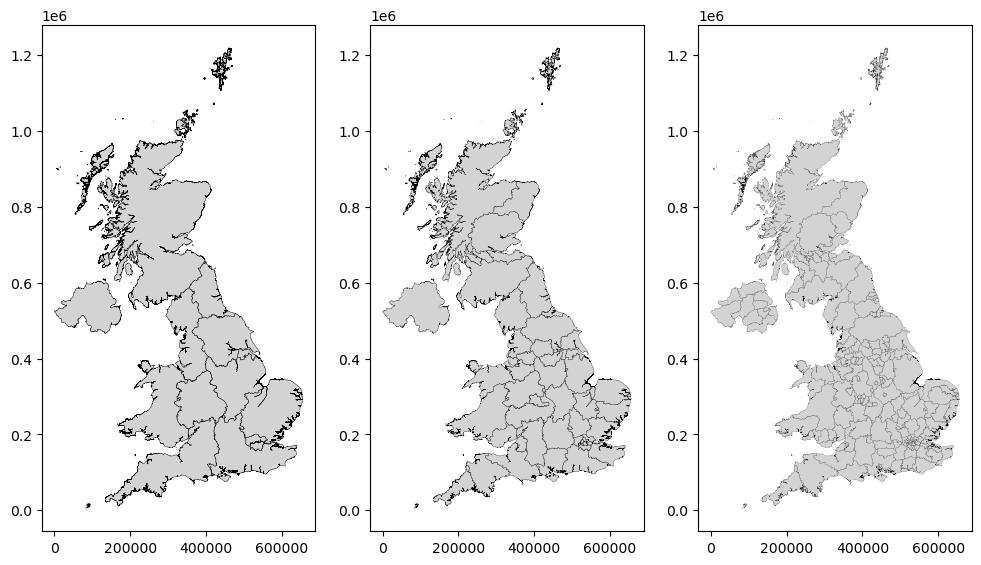

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharex=False, sharey=False, figsize=(12,12))

UK_regiones.plot(ax=ax1, facecolor='lightgrey', edgecolor='black',linewidth=0.3)
UK_condados.plot(ax=ax2, facecolor='lightgrey', edgecolor='black',linewidth=0.2)
UK_distritos.plot(ax=ax3, facecolor='lightgrey', edgecolor='black',linewidth=0.1)

In [ ]:
UK_regiones.to_file(os.path.join("maps","UKMaps_27700.gpkg"), layer='regiones', driver="GPKG")
UK_condados.to_file(os.path.join("maps","UKMaps_27700.gpkg"), layer='condados', driver="GPKG")
UK_distritos.to_file(os.path.join("maps","UKMaps_27700.gpkg"), layer='distritos', driver="GPKG")

In [ ]:
countries.head()

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


In [ ]:
#Ejercicio 5

In [ ]:
countries.head()

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


In [3]:
import pandas as pd
fragilityCiaLink="https://github.com/CienciaDeDatosEspacial/merging/raw/main/FragilityCia_isos.csv"

fragilityCia=pd.read_csv(fragilityCiaLink)

fragilityCia

,Country,Officialstatename,InternetccTLD,iso2,iso3,fragility,co2,region,ForestRev_gdp
0,AFGHANISTAN,The Islamic Republic of Afghanistan,.af,AF,AFG,105.0,7893000.0,SOUTH ASIA,0.20
1,ALBANIA,The Republic of Albania,.al,AL,ALB,58.9,3794000.0,EUROPE,0.18
2,ALGERIA,The People's Democratic Republic of Algeria,.dz,DZ,DZA,75.4,151633000.0,AFRICA,0.10
3,ANGOLA,The Republic of Angola,.ao,AO,AGO,87.8,19362000.0,AFRICA,0.36
4,ANTIGUA AND BARBUDA,Antigua and Barbuda,.ag,AG,ATG,54.4,729000.0,CENTRAL AMERICA AND THE CARIBBEAN,0.00
...,...,...,...,...,...,...,...,...,...
165,UZBEKISTAN,The Republic of Uzbekistan,.uz,UZ,UZB,75.7,102965000.0,CENTRAL ASIA,0.00
166,VIET NAM,The Socialist Republic of Viet Nam,.vn,VN,VNM,66.1,249929000.0,EAST AND SOUTHEAST ASIA,1.49
167,YEMEN,The Republic of Yemen,.ye,YE,YEM,113.5,10158000.0,MIDDLE EAST,0.04
168,ZAMBIA,The Republic of Zambia,.zm,ZM,ZMB,85.7,6798000.0,AFRICA,4.45


In [57]:
countries['COUNTRY']=countries.COUNTRY.str.upper()

In [58]:
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)

In [61]:
onlyFragilCia

{'BAHAMAS (THE)',
 'BOLIVIA (PLURINATIONAL STATE OF)',
 'BRUNEI DARUSSALAM',
 'CABO VERDE',
 'CENTRAL AFRICAN REPUBLIC (THE)',
 'COMOROS (THE)',
 'CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
 'CONGO (THE)',
 "CÔTE D'IVOIRE",
 'DOMINICAN REPUBLIC (THE)',
 'ESWATINI',
 'GAMBIA (THE)',
 'IRAN (ISLAMIC REPUBLIC OF)',
 'KOREA (THE REPUBLIC OF)',
 "LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)",
 'MICRONESIA (FEDERATED STATES OF)',
 'MOLDOVA (THE REPUBLIC OF)',
 'NETHERLANDS (THE)',
 'NIGER (THE)',
 'NORTH MACEDONIA',
 'NORTHERN MARIANA ISLANDS (THE)',
 'PHILIPPINES (THE)',
 'RUSSIAN FEDERATION (THE)',
 'SAMOA',
 'SUDAN (THE)',
 'TANZANIA, THE UNITED REPUBLIC OF',
 'TIMOR-LESTE',
 'UNITED ARAB EMIRATES (THE)',
 'UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND (THE)',
 'UNITED STATES OF AMERICA (THE)',
 'VIET NAM'}

In [62]:
onlyMap

{'AMERICAN SAMOA (US)',
 'AMERICAN VIRGIN ISLANDS (US)',
 'ANDORRA',
 'ANGUILLA (UK)',
 'ANTARCTICA',
 'ARUBA (NETHERLANDS)',
 'BAHAMAS',
 'BAKER ISLAND (US)',
 'BERMUDA (UK)',
 'BOLIVIA',
 'BONAIRE (NETHERLANDS)',
 'BOUVET ISLAND (NORWAY)',
 'BRITISH INDIAN OCEAN TERRITORY (UK)',
 'BRITISH VIRGIN ISLANDS(UK)',
 'BRUNEI',
 'CAPE VERDE',
 'CAYMAN ISLANDS (UK)',
 'CENTRAL AFRICAN REPUBLIC',
 'CHRISTMAS ISLAND (AUSTRALIA)',
 'COCOS (KEELING) ISLANDS (AUSTRALIA)',
 'COMOROS',
 'CONGO',
 'COOK ISLANDS (NEW ZEALAND)',
 'CURACAO (NETHERLANDS)',
 'CZECH REPUBLIC',
 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'DOMINICA',
 'DOMINICAN REPUBLIC',
 'EAST TIMOR',
 'ERITREA',
 'FALKLAND ISLANDS (UK)',
 'FAROE ISLANDS (DENMARK)',
 'FEDERATED STATES OF MICRONESIA',
 'FRENCH GUIANA (FRANCE)',
 'FRENCH POLYNESIA (FRANCE)',
 'FRENCH SOUTHERN & ANTARCTIC LANDS (FRANCE)',
 'GAMBIA',
 'GIBRALTAR (UK)',
 'GLORIOSO ISLANDS (FRANCE)',
 'GREENLAND (DENMARK)',
 'GUADELOUPE (FRANCE)',
 'GUAM (US)',
 'GUERNSEY (UK)',
 'HE

In [59]:
DataNames=['fragility', 'co2', 'ForestRev_gdp']

In [65]:
theMapAndData=countries.merge(fragilityCia,left_on='COUNTRY', right_on='Country')

theMapAndData.drop(columns=['Country'],inplace=True) # no need for this column
# here it is (new map):
theMapAndData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   COUNTRY            139 non-null    object  
 1   geometry           139 non-null    geometry
 2   Officialstatename  139 non-null    object  
 3   InternetccTLD      139 non-null    object  
 4   iso2               138 non-null    object  
 5   iso3               139 non-null    object  
 6   fragility          139 non-null    float64 
 7   co2                139 non-null    float64 
 8   region             139 non-null    object  
 9   ForestRev_gdp      139 non-null    float64 
dtypes: float64(3), geometry(1), object(6)
memory usage: 11.0+ KB


In [66]:
pd.melt(theMapAndData[DataNames])

,variable,value
0,fragility,54.40
1,fragility,105.00
2,fragility,75.40
3,fragility,73.20
4,fragility,58.90
...,...,...
412,ForestRev_gdp,0.04
413,ForestRev_gdp,4.45
414,ForestRev_gdp,1.61
415,ForestRev_gdp,2.65


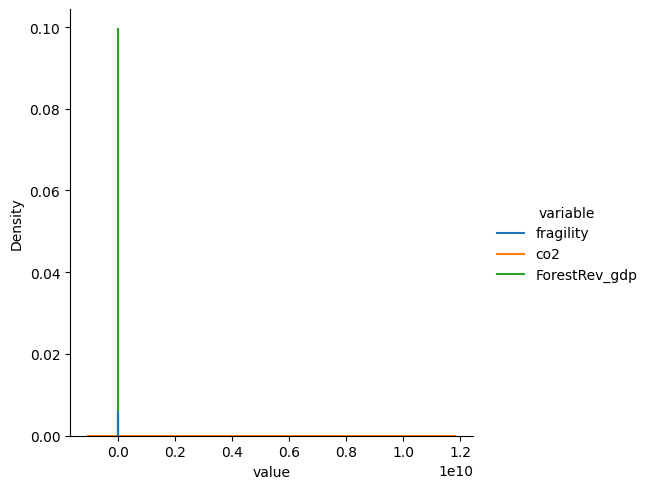

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(pd.melt(theMapAndData[DataNames]),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

In [68]:
!pip install -U scikit-learn


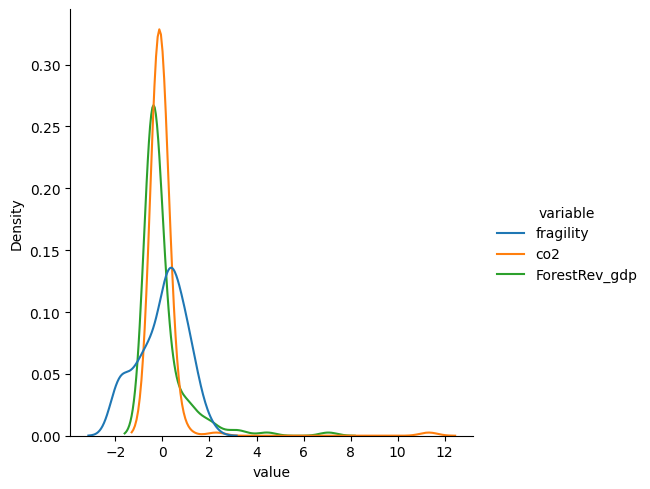

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_data = scaler.fit_transform(theMapAndData[DataNames])
sns.displot(pd.melt(pd.DataFrame(normalized_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

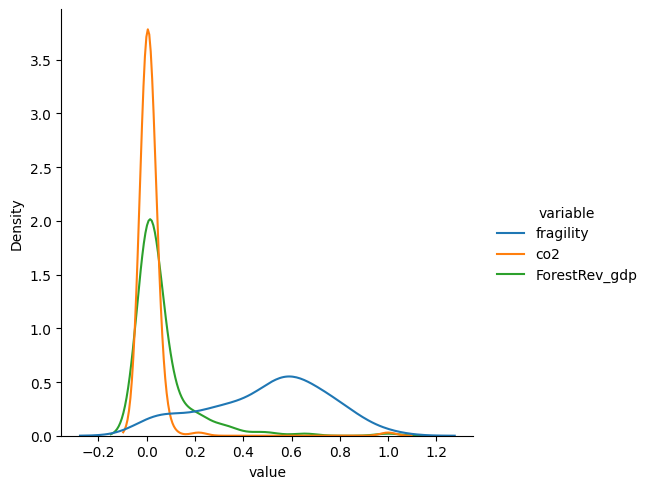

In [70]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data=scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(scaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

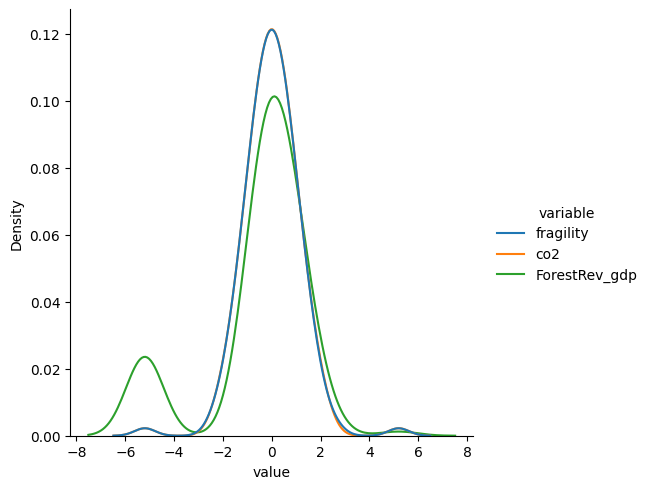

In [71]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(n_quantiles=99, random_state=0,output_distribution='normal') #or 'uniform'
QtScaled_data = scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(QtScaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

In [72]:
theMapAndData['fragility_Qt']=QtScaled_data[:,0]

In [73]:
! pip show numba mapclassify numpy

Name: numba
Version: 0.60.0
Summary: compiling Python code using LLVM
Home-page: https://numba.pydata.org
Author: 
Author-email: 
License: BSD
Location: /usr/local/lib/python3.11/dist-packages
Requires: llvmlite, numpy
Required-by: cudf-cu12, cuml-cu12, dask-cuda, distributed-ucxx-cu12, librosa, numba-cuda, pynndescent, shap, stumpy, umap-learn
---
Name: numpy
Version: 2.0.2
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2024, NumPy Developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are
met:

    * Redistributions of source code must retain the above copyright
       notice, this list of conditions and the following disclaimer.

    * Redistributions in binary form must reproduce the above
       copyright notice, this list of conditions and the following

In [77]:
import mapclassify
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=theMapAndData.fragility_Qt
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

In [78]:
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

<Axes: ylabel='Classifier'>

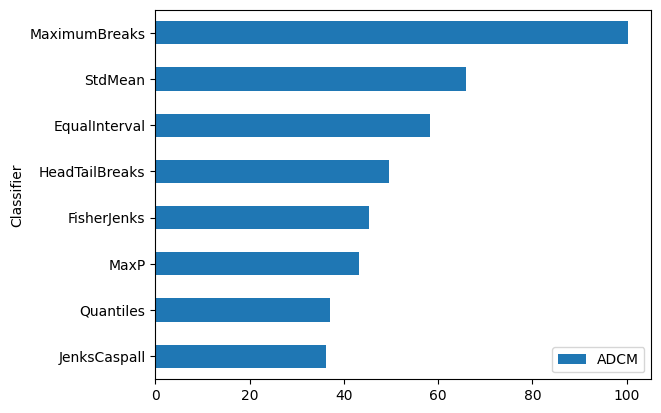

In [79]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')

In [80]:
theMapAndData['fragility_Qt_jc5'] = jc5.yb

In [81]:
theMapAndData[['fragility_Qt','fragility_Qt_jc5']].head()

,fragility_Qt,fragility_Qt_jc5
0,-0.498095,1
1,2.024251,4
2,0.336769,3
3,0.267083,2
4,-0.389953,1


In [82]:
indexList=['fragility_Qt_jc5'] # add more?
aggregator={'fragility_Qt': ['mean']}

pd.concat([theMapAndData[['fragility_Qt',col]].groupby(col,as_index=False).agg(aggregator) for col in indexList],axis=1)

,fragility_Qt_jc5,fragility_Qt
,,mean
0,0,-1.607475
1,1,-0.596870
2,2,0.009090
3,3,0.632445
4,4,1.675707


In [83]:
newLabelsForLevels={0:"0_Great", 1:"1_Good", 2:"2_Middle", 3:"3_Bad", 4:"4_Poor"}

theMapAndData['fragility_Qt_jc5_cat']=theMapAndData.loc[:,'fragility_Qt_jc5'].replace(newLabelsForLevels)

# we have
theMapAndData[['fragility_Qt','fragility_Qt_jc5','fragility_Qt_jc5_cat']].head(20)

,fragility_Qt,fragility_Qt_jc5,fragility_Qt_jc5_cat
0,-0.498095,1,1_Good
1,2.024251,4,4_Poor
2,0.336769,3,3_Bad
3,0.267083,2,2_Middle
4,-0.389953,1,1_Good
5,-0.182356,2,2_Middle
6,0.984922,3,3_Bad
7,-0.756771,1,1_Good
8,-1.880910,0,0_Great
9,-1.359737,0,0_Great


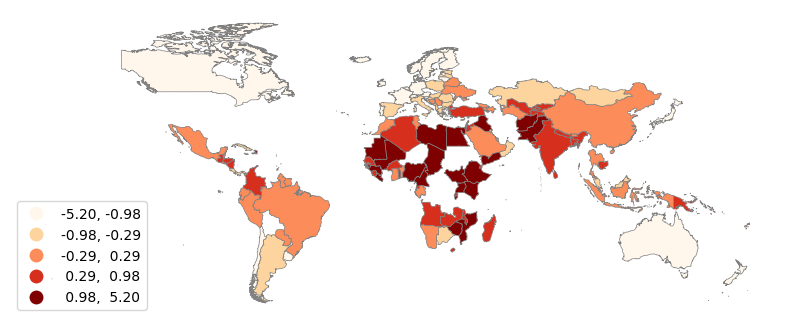

In [84]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='fragility_Qt',
                   cmap='OrRd',
                   scheme="jenkscaspall",k=5,
        edgecolor='grey',
        linewidth=0.5,
        alpha=1,
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

In [85]:
theMapAndData.to_file(os.path.join("maps","worldMaps.gpkg"), layer='indicators', driver="GPKG")

In [98]:
import os, geopandas as gpd
import pandas as pd
UK_emissions=gpd.read_file("https://github.com/Enrique867/introgeodf/raw/refs/heads/main/Data/2005-2022-local-authority-ghg-emissions-csv-dataset.csv")
UK_emissions.head()

,Country,Country Code,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,LA GHG Sector,LA GHG Sub-sector,Greenhouse gas,Territorial emissions (kt CO2e),CO2 emissions within the scope of influence of LAs (kt CO2),Mid-year Population (thousands),Area (km2)
0,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,CO2,1.678178175,1.678178175,90.457,98.3466
1,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,CH4,5.27E-02,0,90.457,98.3466
2,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,N2O,6.77E-03,0,90.457,98.3466
3,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Gas,CO2,0.311375484,0.311375484,90.457,98.3466
4,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Gas,CH4,1.05E-02,0,90.457,98.3466


In [99]:
df_filtered = UK_emissions[UK_emissions['Greenhouse gas'].str.contains('CO2', na=False)]
df_filtered = df_filtered[df_filtered['Calendar Year'].str.contains('2022', na=False)]
df_filtered.head()

,Country,Country Code,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,LA GHG Sector,LA GHG Sub-sector,Greenhouse gas,Territorial emissions (kt CO2e),CO2 emissions within the scope of influence of LAs (kt CO2),Mid-year Population (thousands),Area (km2)
1382,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2022,Agriculture,Agriculture Electricity,CO2,0.390442977,0.390442977,93.861,98.3466
1385,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2022,Agriculture,Agriculture Gas,CO2,5.45E-02,5.45E-02,93.861,98.3466
1390,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2022,Agriculture,Agriculture 'Other',CO2,0.927824376,0.927824376,93.861,98.3466
1393,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2022,Agriculture,Agriculture Soils,CO2,0.606549128,0,93.861,98.3466
1395,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2022,Commercial,Commercial Electricity,CO2,13.50475997,13.50475997,93.861,98.3466


In [100]:
df_filtered = df_filtered.reset_index(drop=True)
df_filtered.head()

,Country,Country Code,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,LA GHG Sector,LA GHG Sub-sector,Greenhouse gas,Territorial emissions (kt CO2e),CO2 emissions within the scope of influence of LAs (kt CO2),Mid-year Population (thousands),Area (km2)
0,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2022,Agriculture,Agriculture Electricity,CO2,0.390442977,0.390442977,93.861,98.3466
1,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2022,Agriculture,Agriculture Gas,CO2,5.45E-02,5.45E-02,93.861,98.3466
2,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2022,Agriculture,Agriculture 'Other',CO2,0.927824376,0.927824376,93.861,98.3466
3,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2022,Agriculture,Agriculture Soils,CO2,0.606549128,0,93.861,98.3466
4,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2022,Commercial,Commercial Electricity,CO2,13.50475997,13.50475997,93.861,98.3466


In [101]:
df_filtered= df_filtered.drop(['CO2 emissions within the scope of influence of LAs (kt CO2)'], axis=1)
df_filtered.head()

,Country,Country Code,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,LA GHG Sector,LA GHG Sub-sector,Greenhouse gas,Territorial emissions (kt CO2e),Mid-year Population (thousands),Area (km2)
0,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2022,Agriculture,Agriculture Electricity,CO2,0.390442977,93.861,98.3466
1,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2022,Agriculture,Agriculture Gas,CO2,5.45E-02,93.861,98.3466
2,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2022,Agriculture,Agriculture 'Other',CO2,0.927824376,93.861,98.3466
3,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2022,Agriculture,Agriculture Soils,CO2,0.606549128,93.861,98.3466
4,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2022,Commercial,Commercial Electricity,CO2,13.50475997,93.861,98.3466


In [102]:
df_filtered['Territorial emissions (kt CO2e)'] = pd.to_numeric(df_filtered['Territorial emissions (kt CO2e)'], errors='coerce')
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10388 entries, 0 to 10387
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          10388 non-null  object 
 1   Country Code                     10388 non-null  object 
 2   Region                           10388 non-null  object 
 3   Region Code                      10388 non-null  object 
 4   Second Tier Authority            10388 non-null  object 
 5   Local Authority                  10388 non-null  object 
 6   Local Authority Code             10388 non-null  object 
 7   Calendar Year                    10388 non-null  object 
 8   LA GHG Sector                    10388 non-null  object 
 9   LA GHG Sub-sector                10388 non-null  object 
 10  Greenhouse gas                   10388 non-null  object 
 11  Territorial emissions (kt CO2e)  10388 non-null  float64
 12  Mid-year Populatio

In [103]:
df_filtered= df_filtered.groupby(['Region', 'Region Code','Second Tier Authority','Local Authority','Local Authority Code','Area (km2)'])['Territorial emissions (kt CO2e)'].sum()

In [132]:
df_filtered.head()

Region         Region Code  Second Tier Authority  Local Authority   Local Authority Code  Area (km2)
East Midlands  E12000004    Derby                  Derby             E06000015             78.0311       1132.173745
                            Derbyshire             Amber Valley      E07000032             265.4379       601.955617
                                                   Bolsover          E07000033             160.3347       925.946697
                                                   Chesterfield      E07000034             66.0352        424.589203
                                                   Derbyshire Dales  E07000035             795.3178       500.794869
Name: Territorial emissions (kt CO2e), dtype: float64

In [104]:
df_filtered = df_filtered.reset_index()
df_filtered.head()

,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Area (km2),Territorial emissions (kt CO2e)
0,East Midlands,E12000004,Derby,Derby,E06000015,78.0311,1132.173745
1,East Midlands,E12000004,Derbyshire,Amber Valley,E07000032,265.4379,601.955617
2,East Midlands,E12000004,Derbyshire,Bolsover,E07000033,160.3347,925.946697
3,East Midlands,E12000004,Derbyshire,Chesterfield,E07000034,66.0352,424.589203
4,East Midlands,E12000004,Derbyshire,Derbyshire Dales,E07000035,795.3178,500.794869


In [105]:
df_filtered=df_filtered.drop(['index'], axis=1)
df_filtered.head()

KeyError: "['index'] not found in axis"

In [106]:
df_filtered = df_filtered.sort_values(by='Region Code', ascending=True)
df_filtered.head()

,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Area (km2),Territorial emissions (kt CO2e)
294,Unallocated,,,Large elec users (high voltage lines) unknown ...,LargeElec,,689.657653
295,Unallocated,,,Unallocated consumption,Unallocated,,-337.720102
296,Unallocated,,,Unallocated electricity NI,Unallocated,,4.872527
114,North East,E12000001,Durham,County Durham,E06000047,2232.6115,2089.354195
124,North East,E12000001,Sunderland,Sunderland,E08000024,139.618,1057.828152


In [107]:
df_filtered = df_filtered.drop(index=[0, 1, 2])

In [108]:
df_filtered = df_filtered.reset_index()
df_filtered.head()

,index,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Area (km2),Territorial emissions (kt CO2e)
0,294,Unallocated,,,Large elec users (high voltage lines) unknown ...,LargeElec,,689.657653
1,295,Unallocated,,,Unallocated consumption,Unallocated,,-337.720102
2,296,Unallocated,,,Unallocated electricity NI,Unallocated,,4.872527
3,114,North East,E12000001,Durham,County Durham,E06000047,2232.6115,2089.354195
4,124,North East,E12000001,Sunderland,Sunderland,E08000024,139.618,1057.828152


In [109]:
df_filtered=df_filtered.drop(['index'], axis=1)
df_filtered.head()

,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Area (km2),Territorial emissions (kt CO2e)
0,Unallocated,,,Large elec users (high voltage lines) unknown ...,LargeElec,,689.657653
1,Unallocated,,,Unallocated consumption,Unallocated,,-337.720102
2,Unallocated,,,Unallocated electricity NI,Unallocated,,4.872527
3,North East,E12000001,Durham,County Durham,E06000047,2232.6115,2089.354195
4,North East,E12000001,Sunderland,Sunderland,E08000024,139.618,1057.828152


In [110]:
df_filtered = df_filtered.drop(index=[0, 1, 2])

In [112]:
df_filtered = df_filtered.reset_index()
df_filtered.head()

,index,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Area (km2),Territorial emissions (kt CO2e)
0,3,North East,E12000001,Durham,County Durham,E06000047,2232.6115,2089.354195
1,4,North East,E12000001,Sunderland,Sunderland,E08000024,139.618,1057.828152
2,5,North East,E12000001,Stockton-on-Tees,Stockton-on-Tees,E06000004,209.7309,1858.236714
3,6,North East,E12000001,South Tyneside,South Tyneside,E08000023,67.0742,441.026546
4,7,North East,E12000001,Darlington,Darlington,E06000005,197.4758,483.317405


In [113]:
df_filtered=df_filtered.drop(['index'], axis=1)
df_filtered.head()

,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Area (km2),Territorial emissions (kt CO2e)
0,North East,E12000001,Durham,County Durham,E06000047,2232.6115,2089.354195
1,North East,E12000001,Sunderland,Sunderland,E08000024,139.618,1057.828152
2,North East,E12000001,Stockton-on-Tees,Stockton-on-Tees,E06000004,209.7309,1858.236714
3,North East,E12000001,South Tyneside,South Tyneside,E08000023,67.0742,441.026546
4,North East,E12000001,Darlington,Darlington,E06000005,197.4758,483.317405


In [114]:
df_filtered= df_filtered.groupby(['Region Code'])['Territorial emissions (kt CO2e)'].sum()

In [115]:
df_filtered = df_filtered.reset_index()

df_filtered

,Region Code,Territorial emissions (kt CO2e)
0,E12000001,11909.202991
1,E12000002,33290.144980
2,E12000003,29930.172691
3,E12000004,24879.476486
4,E12000005,26732.387589
5,E12000006,29597.425354
6,E12000007,26124.509534
7,E12000008,36393.680229
8,E12000009,22124.239227
9,N92000002,11602.582296


In [116]:
df_filtered = df_filtered.drop(index=[9, 10, 11])


In [117]:
df_filtered

,Region Code,Territorial emissions (kt CO2e)
0,E12000001,11909.202991
1,E12000002,33290.144980
2,E12000003,29930.172691
3,E12000004,24879.476486
4,E12000005,26732.387589
5,E12000006,29597.425354
6,E12000007,26124.509534
7,E12000008,36393.680229
8,E12000009,22124.239227


In [80]:
df_filtered=df_filtered.drop(['index'], axis=1)

ValueError: No axis named 1 for object type Series

In [54]:
! pip show numba mapclassify numpy

Name: numba
Version: 0.60.0
Summary: compiling Python code using LLVM
Home-page: https://numba.pydata.org
Author: 
Author-email: 
License: BSD
Location: /usr/local/lib/python3.11/dist-packages
Requires: llvmlite, numpy
Required-by: cudf-cu12, cuml-cu12, dask-cuda, distributed-ucxx-cu12, librosa, numba-cuda, pynndescent, shap, stumpy, umap-learn
---
Name: numpy
Version: 2.0.2
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2024, NumPy Developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are
met:

    * Redistributions of source code must retain the above copyright
       notice, this list of conditions and the following disclaimer.

    * Redistributions in binary form must reproduce the above
       copyright notice, this list of conditions and the following

In [55]:
!pip install mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.7/286.7 kB 6.0 MB/s eta 0:00:00


In [119]:
import mapclassify
import numpy as np
import pandas as pd # Make sure pandas is imported

np.random.seed(12345) # so we all get the same results!

# Assuming df_filtered is already defined and contains the necessary column
# Let's create a dummy df_filtered for demonstration if needed, but in your case,
# it should come from previous cells.
# Example dummy data (remove this if df_filtered is defined earlier)
# data = {'Region Code': [1, 2, 3, 4, 5, 6, 7, 8, 9],
#         'Territorial emissions (kt CO2e)': [100, 150, 200, 120, 180, 250, 300, 280, 220]}
# df_filtered = pd.DataFrame(data)

# let's try 5 intervals
K=5
theVar=df_filtered["Territorial emissions (kt CO2e)"]

# Define the classifiers
ei5 = mapclassify.EqualInterval(theVar, k=K)
msd = mapclassify.StdMean(theVar)
q5=mapclassify.Quantiles(theVar,k=K)
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
fj5 = mapclassify.FisherJenks(theVar, k=K)
jc5 = mapclassify.JenksCaspall(theVar, k=K)
mp5 = mapclassify.MaxP(theVar, k=K)

# Define the list of classifiers
class5 = ei5, msd, q5, mb5, ht, fj5, jc5, mp5

# Collect ADCM for each classifier and create the adcms DataFrame
fits = np.array([ c.adcm for c in class5])
adcms = pd.DataFrame(fits)
adcms['classifier'] = [c.name for c in class5]
adcms.columns = ['ADCM', 'Classifier']

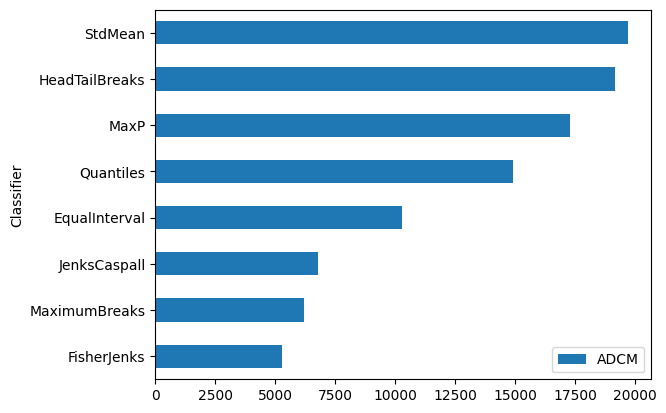

In [120]:
import matplotlib.pyplot as plt # Import matplotlib for plotting

# Plot the ADCM scores
adcms.sort_values('ADCM').plot.barh(x='Classifier')
plt.show() # Add this to display the plot

In [121]:
df_filtered['Territorial emissions (kt CO2e)1'] = jc5.yb

In [123]:
df_filtered[['Territorial emissions (kt CO2e)','Territorial emissions (kt CO2e)1']].head(10)

,Territorial emissions (kt CO2e),Territorial emissions (kt CO2e)1
0,11909.202991,0
1,33290.144980,4
2,29930.172691,3
3,24879.476486,1
4,26732.387589,2
5,29597.425354,3
6,26124.509534,2
7,36393.680229,4
8,22124.239227,1


In [131]:
UK_regiones=gpd.read_file("https://github.com/Enrique867/introgeodf/raw/refs/heads/main/Regions_December_2024_Boundaries_EN_BFC_-8742955026742668245.zip")

Columns in UK_regiones: Index(['RGN24CD', 'RGN24NM', 'BNG_E', 'BNG_N', 'LONG', 'LAT', 'GlobalID',
       'geometry'],
      dtype='object')
Columns in df_filtered: Index(['Region Code', 'Territorial emissions (kt CO2e)',
       'Territorial emissions (kt CO2e)1'],
      dtype='object')


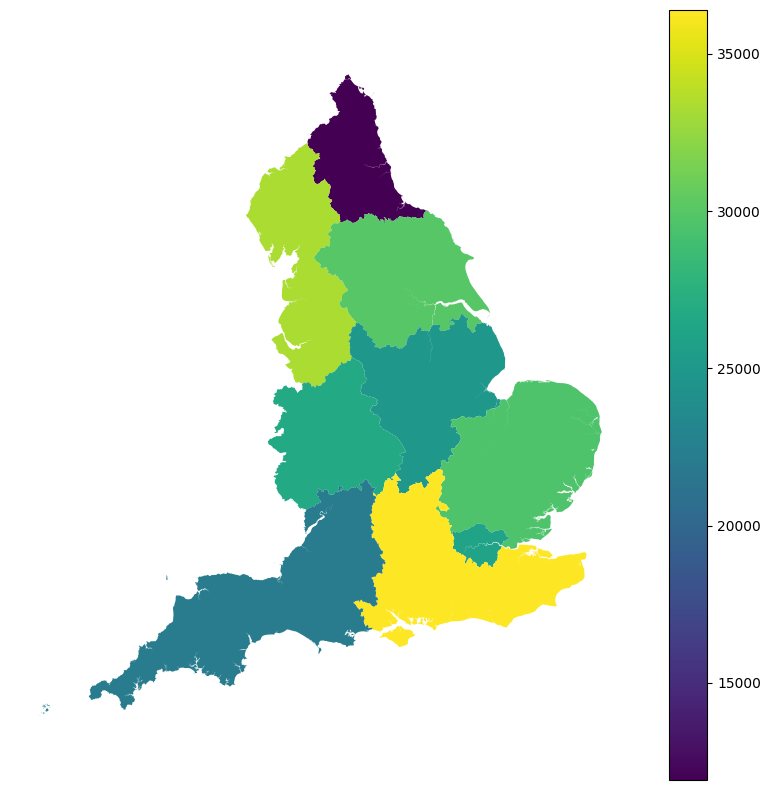

In [134]:
import matplotlib.pyplot as plt
import geopandas as gpd # Ensure geopandas is imported
import pandas as pd # Ensure pandas is imported
import os # Ensure os is imported

# Assuming UK_regiones GeoDataFrame is loaded from a previous cell
# If not, you might need to load it again here:
UK_regiones=gpd.read_file("https://github.com/Enrique867/introgeodf/raw/refs/heads/main/Regions_December_2024_Boundaries_EN_BFC_-8742955026742668245.zip")

# Merge the emissions data with the regional geometries
# Find the common column between UK_regiones and df_filtered for merging
# Based on the code, 'Region Code' seems like a potential merge key in df_filtered.
# You need to inspect UK_regiones.columns to find the corresponding column name.
# Let's assume the column in UK_regiones is named 'ITL121NM' based on previous code.
# **IMPORTANT: Verify the actual column name in UK_regiones that corresponds to 'Region Code' in df_filtered**

# Example merge assuming 'Region Code' in df_filtered corresponds to 'ITL121CD' in UK_regiones
# Check the columns of UK_regiones to confirm the correct column name.
try:
    # Print columns of UK_regiones to identify the correct merge key
    print("Columns in UK_regiones:", UK_regiones.columns)
    print("Columns in df_filtered:", df_filtered.columns)

    # Attempt to merge assuming the column in UK_regiones is named 'RGN24CD' based on
    # the global variable UK_regiones which shows 'RGN24CD' as a column.
    # You might need to change 'RGN24CD' based on the actual data in UK_regiones
    merged_gdf = UK_regiones.merge(df_filtered, left_on='RGN24CD', right_on='Region Code')
except KeyError:
    # If the merge key is incorrect, you will get a KeyError.
    # Print the columns to help identify the correct merge key.
    print("Merge failed. Check the column names for merging.")
    print("Columns in UK_regiones:", UK_regiones.columns)
    print("Columns in df_filtered:", df_filtered.columns)
    # You might want to stop execution or handle this error appropriately
    raise

# Now merged_gdf is a GeoDataFrame and can be plotted with geospatial parameters
f, ax = plt.subplots(1, figsize=(10, 10))

# Plot the merged GeoDataFrame
# Use a column from df_filtered for coloring, e.g., 'Territorial emissions (kt CO2e)'
merged_gdf.plot(column='Territorial emissions (kt CO2e)', # variable to plot
                   cmap='viridis', # set of colors
                   legend=True, # need a legend?
                   # legend_kwds={'loc':"lower left"}, # Removed the invalid 'loc' keyword
                   ax=ax
       )

ax.set_axis_off()
plt.show() # Display the plot